## Importing our libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

## Loading the data:

In [2]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Preprocessing and cleaning:

In [3]:
# Check the count of columns and rows in our data:
df.shape

(891, 12)

In [4]:
# Getting a statistical summary:
df.describe().round()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0,891.0,891.0,714.0,891.0,891.0,891.0
mean,446.0,0.0,2.0,30.0,1.0,0.0,32.0
std,257.0,0.0,1.0,15.0,1.0,1.0,50.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,224.0,0.0,2.0,20.0,0.0,0.0,8.0
50%,446.0,0.0,3.0,28.0,0.0,0.0,14.0
75%,668.0,1.0,3.0,38.0,1.0,0.0,31.0
max,891.0,1.0,3.0,80.0,8.0,6.0,512.0


In [5]:
# Check for missing values:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Drop missing values:
df.dropna(inplace=True)

# Check for missing values:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
# Check for duplicated values:
df.duplicated().sum()

0

In [8]:
# Dropping the clomns we don't need
df = df.drop(columns = ["Cabin","Embarked","Ticket"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500


In [9]:
df["Age"] = df["Age"].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    int32  
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Fare         183 non-null    float64
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 13.6+ KB


## Simple & quick Exploratory Data Analysis

#### Research Question 1 ( What is the count of each gender in the dataset? )

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

C:\Users\User\anaconda4new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

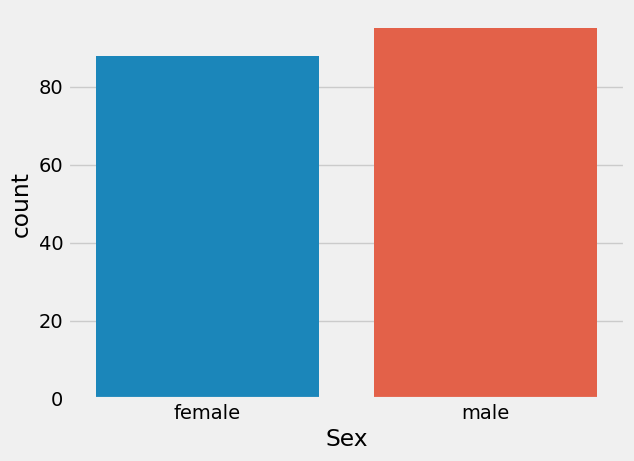

In [12]:
sns.countplot("Sex", data=df)

##### Research Question 2 ( How many survivors, and how many did not survive the accident ?)

C:\Users\User\anaconda4new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '0 = No, 1 = Yes')

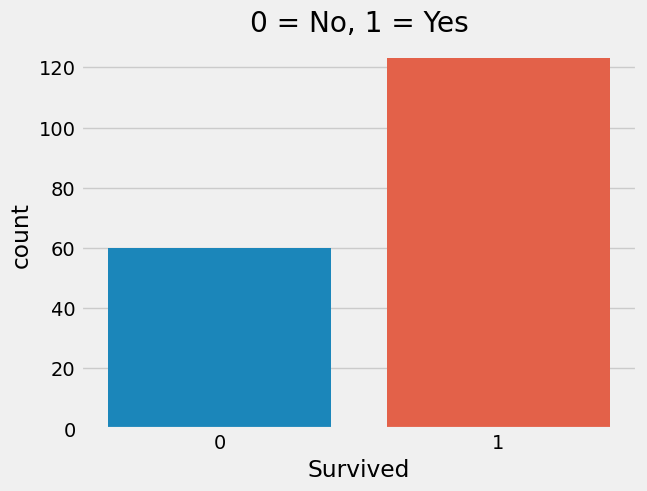

In [13]:
sns.countplot("Survived", data=df)
plt.title("0 = No, 1 = Yes")

#### Research Question 3 ( What is the distribution of the age in the data set ?)

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

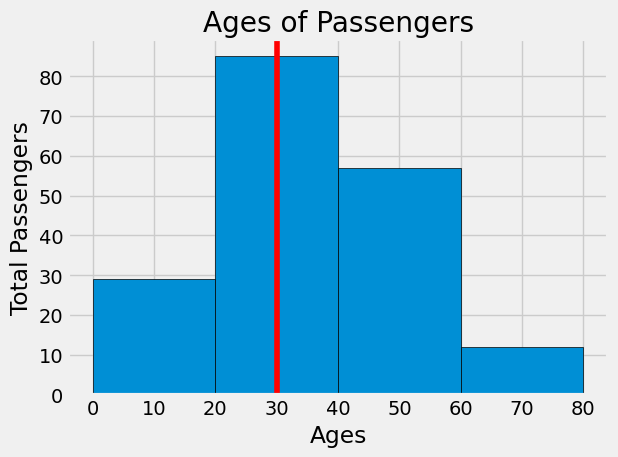

In [15]:
mean_age = 30

plt.hist(df["Age"],bins = 4, edgecolor = "black")
plt.axvline(mean_age, color = "red")

plt.title('Ages of Passengers')
plt.xlabel('Ages')
plt.ylabel('Total Passengers')

plt.tight_layout()

#### Research Question 4 ( What is the distribution of the Passenger fare in the data set ?)

In [16]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

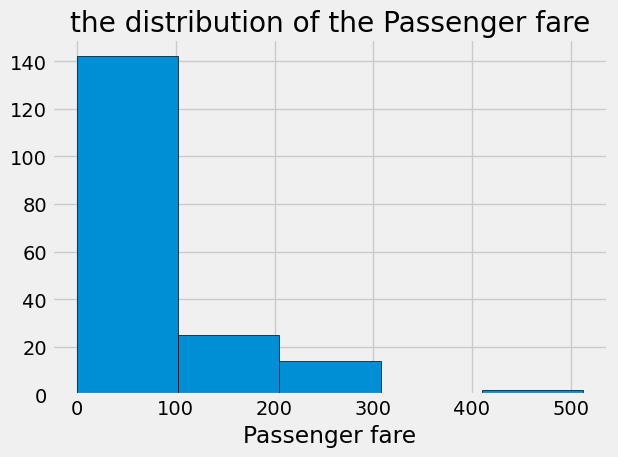

In [17]:

plt.hist(df["Fare"],bins=5,edgecolor = "black")

plt.title('the distribution of the Passenger fare')
plt.xlabel('Passenger fare')

plt.tight_layout()

#### Research Question 5 ( Is there any relationship between the passenger fare and  Survive?)¶

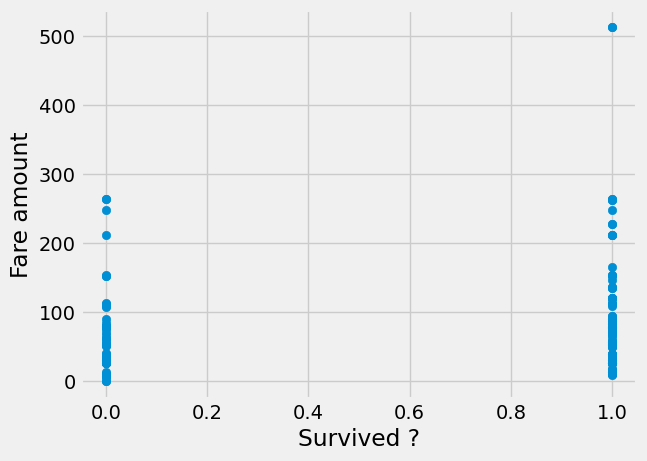

In [18]:
plt.scatter(df["Survived"],df["Fare"])
plt.xlabel("Survived ?")
plt.ylabel("Fare amount");

In the event that it is assumed that passengers paying a higher amount means obtaining a better and safer class, and thus a greater chance of surviving the accident, the above graph shows that there is no clear relationship between the amount paid and surviving the accident.

#### Research Question 6 ( Is there any relationship between the passenger age and Survive?)

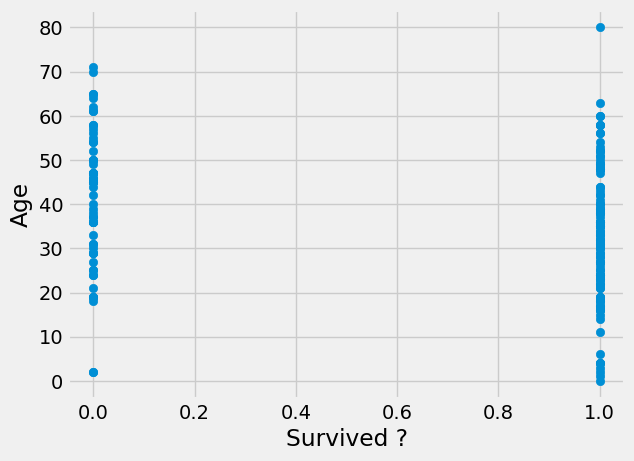

In [19]:
plt.scatter(df["Survived"],df["Age"]);
plt.xlabel("Survived ?")
plt.ylabel("Age");

As we can see above, the number of surviving children under the age of 15 is more than those who did not survive, and the elderly over the age of 50 are higher than those who did not survive, and most of the survivors were between the age of 10 and 55.

## Preprocessing for machine learning model:

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare'],
      dtype='object')

##### lets drop unwanted columns

In [21]:
df = df.drop(columns=["PassengerId","Name"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
1,1,1,female,38,1,0,71.2833
3,1,1,female,35,1,0,53.1000
6,0,1,male,54,0,0,51.8625
10,1,3,female,4,1,1,16.7000
11,1,1,female,58,0,0,26.5500


##### Replacing "Sex" column values with 0 & 1, Female = 1, Male = 0.

In [22]:
dummy = pd.get_dummies(df["Sex"])

dummy.head(1)

,female,male
1,1,0


In [23]:
# Concatonatong the dataframe with new sex table:
newdf = pd.concat((df,dummy),axis = 1)
newdf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,female,male
1,1,1,female,38,1,0,71.2833,1,0
3,1,1,female,35,1,0,53.1000,1,0
6,0,1,male,54,0,0,51.8625,0,1
10,1,3,female,4,1,1,16.7000,1,0
11,1,1,female,58,0,0,26.5500,1,0


In [24]:
# Dropping "Fameale" and Sex columns
newdf = newdf.drop(columns=["female","Sex"])

# Rename "male" column to sex
newdf = newdf.rename(columns={"male":"Sex"})

newdf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
1,1,1,38,1,0,71.2833,0
3,1,1,35,1,0,53.1000,0
6,0,1,54,0,0,51.8625,1
10,1,3,4,1,1,16.7000,0
11,1,1,58,0,0,26.5500,0


##### Normalizing the features

In [25]:
Age = newdf["Age"].values.reshape(-1, 1)
Fare = newdf["Fare"].values.reshape(-1, 1)

In [26]:
scaler = preprocessing.MinMaxScaler() # Calling the normalizer

scaler.fit(Age)  # Fitting the normalizer to our data
scaler.fit(Fare) 
Age = scaler.fit_transform(Age) # Normalizing our data
Fare = scaler.fit_transform(Fare)


print(Age[:5])
print(Fare[:5])

[[0.475 ]
 [0.4375]
 [0.675 ]
 [0.05  ]
 [0.725 ]]
[[0.13913574]
 [0.1036443 ]
 [0.10122886]
 [0.03259623]
 [0.05182215]]


In [27]:
newdf["Age"] = Age
newdf["Fare"] = Fare

newdf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex
1,1,1,0.4750,1,0,0.139136,0
3,1,1,0.4375,1,0,0.103644,0
6,0,1,0.6750,0,0,0.101229,1
10,1,3,0.0500,1,1,0.032596,0
11,1,1,0.7250,0,0,0.051822,0


##### Creating x & y variables and splitting the data:

In [28]:
x = newdf.drop(columns = "Survived", axis=1)
y = newdf["Survived"]

print(x)
print(y)

     Pclass     Age  SibSp  Parch      Fare  Sex
1         1  0.4750      1      0  0.139136    0
3         1  0.4375      1      0  0.103644    0
6         1  0.6750      0      0  0.101229    1
10        3  0.0500      1      1  0.032596    0
11        1  0.7250      0      0  0.051822    0
..      ...     ...    ...    ...       ...  ...
871       1  0.5875      1      1  0.102579    0
872       1  0.4125      0      0  0.009759    1
879       1  0.7000      0      1  0.162314    0
887       1  0.2375      0      0  0.058556    0
889       1  0.3250      0      0  0.058556    1

[183 rows x 6 columns]
1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64


In [29]:
# splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##### Training the model:

In [30]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

##### Making predictions on test data & evaluting the model:

In [31]:
y_pred = knn.predict(x_test)

print("The model accuracy score is:", metrics.accuracy_score(y_test,y_pred))

The model accuracy score is: 0.8108108108108109


C:\Users\User\anaconda4new\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
